In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Student_Dataset.csv to Student_Dataset.csv


In [16]:
import pandas as pd

student_data = pd.read_csv('Student_Dataset.csv', encoding='ISO-8859-1')

In [4]:
import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

# Additional models
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc

In [17]:
print(student_data.shape)
print(student_data.index)
print(student_data.columns)
print(len(student_data.columns))

(1164, 13)
RangeIndex(start=0, stop=1164, step=1)
Index(['Age', 'Year of study', 'Field of study', 'Frequency of smoking',
       'Age of starting smoking', 'Reasons for smoking',
       'Frequency of alcohol consumption', 'Typical alcohol intake in a week',
       'Reasons for consuming alcohol', 'To cope with stress',
       'Help-seeking behavior for mental health',
       'Interest in reducing or quitting smoking/alcohol consumption',
       'Psychological Wellness'],
      dtype='object')
13


In [18]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Age                                                           1156 non-null   object
 1   Year of study                                                 1159 non-null   object
 2   Field of study                                                1160 non-null   object
 3   Frequency of smoking                                          1162 non-null   object
 4   Age of starting smoking                                       1164 non-null   object
 5   Reasons for smoking                                           1164 non-null   object
 6   Frequency of alcohol consumption                              1164 non-null   object
 7   Typical alcohol intake in a week                              1164 non-null   

In [19]:
student_data.describe()

,Age,Year of study,Field of study,Frequency of smoking,Age of starting smoking,Reasons for smoking,Frequency of alcohol consumption,Typical alcohol intake in a week,Reasons for consuming alcohol,To cope with stress,Help-seeking behavior for mental health,Interest in reducing or quitting smoking/alcohol consumption,Psychological Wellness
count,1156,1159,1160,1162,1164,1164,1164,1164,1164,1164,1164,1164,1164
unique,4,5,5,5,5,5,5,5,5,6,2,2,5
top,24-26,4th year,Science and Technology,Daily,21-23,To reduce stress,Only on social occasions,1-2 drinks,To cope with stress,Drinking alcohol,Yes,Yes,Below average
freq,535,318,362,755,832,435,735,707,671,871,1076,878,544


In [20]:
student_data.isnull().sum()

,0
Age,8
Year of study,5
Field of study,4
Frequency of smoking,2
Age of starting smoking,0
Reasons for smoking,0
Frequency of alcohol consumption,0
Typical alcohol intake in a week,0
Reasons for consuming alcohol,0
To cope with stress,0


In [21]:
student_data['Age']=student_data['Age'].fillna(student_data['Age'].mode()[0])
student_data['Year of study']=student_data['Year of study'].fillna(student_data['Year of study'].mode()[0])
student_data['Field of study']=student_data['Field of study'].fillna(student_data['Field of study'].mode()[0])
student_data['Frequency of smoking']=student_data['Frequency of smoking'].fillna(student_data['Frequency of smoking'].mode()[0])
student_data['Reasons for consuming alcohol']=student_data['Reasons for consuming alcohol'].fillna(student_data['Reasons for consuming alcohol'].mode()[0])

student_data.isnull().sum()

,0
Age,0
Year of study,0
Field of study,0
Frequency of smoking,0
Age of starting smoking,0
Reasons for smoking,0
Frequency of alcohol consumption,0
Typical alcohol intake in a week,0
Reasons for consuming alcohol,0
To cope with stress,0


In [22]:

import pandas as pd

# Age
age_mapping = {
    '18-20': 0,
    '21-23': 1,
    '24-26': 2,
    '27 or older': 3
}
student_data['Age'] = student_data['Age'].map(age_mapping)

# Year of study
year_mapping = {
    '1st year': 0,
    '2nd year': 1,
    '3rd year': 2,
    '4th year': 3,
    'Graduate student': 4
}
student_data['Year of study'] = student_data['Year of study'].map(year_mapping)

# Frequency of smoking
smoking_mapping = {
    'Dont smoke': 0,
    'Only on social occasions': 1,
    'Monthly': 2,
    'Weekly': 3,
    'Daily': 4
}
student_data['Frequency of smoking'] = student_data['Frequency of smoking'].map(smoking_mapping)

# Age of starting smoking
age_start_smoke_mapping = {
    'Dont smoke': 0,
    '24 or older': 1,
    '21-23': 2,
    '18-20': 3,
    'Below 18': 4
}
student_data['Age of starting smoking'] = student_data['Age of starting smoking'].map(age_start_smoke_mapping)

# Frequency of alcohol consumption
alcohol_freq_mapping = {
    'Dont consume alcohol': 0,
    'Only on social occasions': 1,
    'Monthly': 2,
    'Weekly': 3,
    'Daily': 4
}
student_data['Frequency of alcohol consumption'] = student_data['Frequency of alcohol consumption'].map(alcohol_freq_mapping)

# Typical alcohol intake in a week
alcohol_intake_mapping = {
    'Dont drink alcohol': 0,
    '1-2 drinks': 1,
    '3-5 drinks': 2,
    '6-10 drinks': 3,
    'More than 10 drinks': 4
}
student_data['Typical alcohol intake in a week'] = student_data['Typical alcohol intake in a week'].map(alcohol_intake_mapping)

# Help-seeking behavior for mental health
help_seeking_mapping = {
    'Yes': 0,
    'No': 1
}
student_data['Help-seeking behavior for mental health'] = student_data['Help-seeking behavior for mental health'].map(help_seeking_mapping)

# Interest in reducing or quitting smoking/alcohol consumption
interest_reduce_mapping = {
    'Yes': 0,
    'No': 1
}
student_data['Interest in reducing or quitting smoking/alcohol consumption'] = student_data['Interest in reducing or quitting smoking/alcohol consumption'].map(interest_reduce_mapping)

# Psychological Wellness
psych_wellness_mapping = {
    'Excellent': 0,
    'Good': 1,
    'Average': 2,
    'Below average': 3,
    'Poor': 4
}
student_data['Psychological Wellness'] = student_data['Psychological Wellness'].map(psych_wellness_mapping)



student_data


,Age,Year of study,Field of study,Frequency of smoking,Age of starting smoking,Reasons for smoking,Frequency of alcohol consumption,Typical alcohol intake in a week,Reasons for consuming alcohol,To cope with stress,Help-seeking behavior for mental health,Interest in reducing or quitting smoking/alcohol consumption,Psychological Wellness
0,2,4,Science and Technology,0,0,Dont smoke,0,0,Dont drink alcohol,Other,1,1,1
1,2,4,Science and Technology,4,2,Habit or addiction,0,0,Dont drink alcohol,Smoking,0,0,1
2,3,3,Business and Economics,4,3,Curiosity,1,2,Social purposes,Drinking alcohol,0,1,1
3,1,4,Arts and Humanities,4,2,To reduce stress,4,1,To relax,Exercise,0,0,0
4,0,2,Social Sciences,3,1,Curiosity,1,1,To relax,Drinking alcohol,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,3,3,Arts and Humanities,4,3,Habit or addiction,1,4,For fun,Smoking,1,1,2
1160,2,2,Social Sciences,1,1,Curiosity,1,4,For fun,Drinking alcohol,0,0,4
1161,0,3,Arts and Humanities,4,3,To reduce stress,3,2,To cope with stress,Meditation,1,0,0
1162,2,0,Arts and Humanities,3,4,Curiosity,0,3,To cope with stress,Meditation,0,1,2


In [23]:
cols=['Field of study','Reasons for smoking','Reasons for consuming alcohol', 'To cope with stress']
student_data=pd.get_dummies(student_data, columns = cols)
student_data

,Age,Year of study,Frequency of smoking,Age of starting smoking,Frequency of alcohol consumption,Typical alcohol intake in a week,Help-seeking behavior for mental health,Interest in reducing or quitting smoking/alcohol consumption,Psychological Wellness,Field of study_Arts and Humanities,...,Reasons for consuming alcohol_For fun,Reasons for consuming alcohol_Social purposes,Reasons for consuming alcohol_To cope with stress,Reasons for consuming alcohol_To relax,To cope with stress_Drinking alcohol,To cope with stress_Exercise,To cope with stress_Meditation,To cope with stress_Other,To cope with stress_Smoking,To cope with stress_Socializing
0,2,4,0,0,0,0,1,1,1,False,...,False,False,False,False,False,False,False,True,False,False
1,2,4,4,2,0,0,0,0,1,False,...,False,False,False,False,False,False,False,False,True,False
2,3,3,4,3,1,2,0,1,1,False,...,False,True,False,False,True,False,False,False,False,False
3,1,4,4,2,4,1,0,0,0,True,...,False,False,False,True,False,True,False,False,False,False
4,0,2,3,1,1,1,0,0,0,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,3,3,4,3,1,4,1,1,2,True,...,True,False,False,False,False,False,False,False,True,False
1160,2,2,1,1,1,4,0,0,4,False,...,True,False,False,False,True,False,False,False,False,False
1161,0,3,4,3,3,2,1,0,0,True,...,False,False,True,False,False,False,True,False,False,False
1162,2,0,3,4,0,3,0,1,2,True,...,False,False,True,False,False,False,True,False,False,False


In [24]:
print(student_data.columns)

Index(['Age', 'Year of study', 'Frequency of smoking',
       'Age of starting smoking', 'Frequency of alcohol consumption',
       'Typical alcohol intake in a week',
       'Help-seeking behavior for mental health',
       'Interest in reducing or quitting smoking/alcohol consumption',
       'Psychological Wellness', 'Field of study_Arts and Humanities',
       'Field of study_Business and Economics', 'Field of study_Other',
       'Field of study_Science and Technology',
       'Field of study_Social Sciences', 'Reasons for smoking_Curiosity',
       'Reasons for smoking_Dont smoke',
       'Reasons for smoking_Habit or addiction',
       'Reasons for smoking_Social reasons',
       'Reasons for smoking_To reduce stress',
       'Reasons for consuming alcohol_Dont drink alcohol',
       'Reasons for consuming alcohol_For fun',
       'Reasons for consuming alcohol_Social purposes',
       'Reasons for consuming alcohol_To cope with stress',
       'Reasons for consuming alcohol_To 

In [25]:


student_data['Field of study_Arts and Humanities'] = le.fit_transform(student_data['Field of study_Arts and Humanities'])
student_data['Field of study_Business and Economics'] = le.fit_transform(student_data['Field of study_Business and Economics'])
student_data['Field of study_Other'] = le.fit_transform(student_data['Field of study_Other'])
student_data['Field of study_Science and Technology'] = le.fit_transform(student_data['Field of study_Science and Technology'])
student_data['Field of study_Social Sciences'] = le.fit_transform(student_data['Field of study_Social Sciences'])

student_data['Reasons for smoking_Curiosity'] = le.fit_transform(student_data['Reasons for smoking_Curiosity'])
student_data['Reasons for smoking_Dont smoke'] = le.fit_transform(student_data['Reasons for smoking_Dont smoke'])
student_data['Reasons for smoking_Habit or addiction'] = le.fit_transform(student_data['Reasons for smoking_Habit or addiction'])
student_data['Reasons for smoking_Social reasons'] = le.fit_transform(student_data['Reasons for smoking_Social reasons'])
student_data['Reasons for smoking_To reduce stress'] = le.fit_transform(student_data['Reasons for smoking_To reduce stress'])

student_data['Reasons for consuming alcohol_Dont drink alcohol'] = le.fit_transform(student_data['Reasons for consuming alcohol_Dont drink alcohol'])
student_data['Reasons for consuming alcohol_For fun'] = le.fit_transform(student_data['Reasons for consuming alcohol_For fun'])
student_data['Reasons for consuming alcohol_Social purposes'] = le.fit_transform(student_data['Reasons for consuming alcohol_Social purposes'])
student_data['Reasons for consuming alcohol_To cope with stress'] = le.fit_transform(student_data['Reasons for consuming alcohol_To cope with stress'])
student_data['Reasons for consuming alcohol_To relax'] = le.fit_transform(student_data['Reasons for consuming alcohol_To relax'])

student_data['To cope with stress_Drinking alcohol'] = le.fit_transform(student_data['To cope with stress_Drinking alcohol'])
student_data['To cope with stress_Exercise'] = le.fit_transform(student_data['To cope with stress_Exercise'])
student_data['To cope with stress_Meditation'] = le.fit_transform(student_data['To cope with stress_Meditation'])
student_data['To cope with stress_Other'] = le.fit_transform(student_data['To cope with stress_Other'])
student_data['To cope with stress_Smoking'] = le.fit_transform(student_data['To cope with stress_Smoking'])
student_data['To cope with stress_Socializing'] = le.fit_transform(student_data['To cope with stress_Socializing'])

student_data


,Age,Year of study,Frequency of smoking,Age of starting smoking,Frequency of alcohol consumption,Typical alcohol intake in a week,Help-seeking behavior for mental health,Interest in reducing or quitting smoking/alcohol consumption,Psychological Wellness,Field of study_Arts and Humanities,...,Reasons for consuming alcohol_For fun,Reasons for consuming alcohol_Social purposes,Reasons for consuming alcohol_To cope with stress,Reasons for consuming alcohol_To relax,To cope with stress_Drinking alcohol,To cope with stress_Exercise,To cope with stress_Meditation,To cope with stress_Other,To cope with stress_Smoking,To cope with stress_Socializing
0,2,4,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,4,4,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3,4,3,1,2,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,4,4,2,4,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0,2,3,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,3,3,4,3,1,4,1,1,2,1,...,1,0,0,0,0,0,0,0,1,0
1160,2,2,1,1,1,4,0,0,4,0,...,1,0,0,0,1,0,0,0,0,0
1161,0,3,4,3,3,2,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1162,2,0,3,4,0,3,0,1,2,1,...,0,0,1,0,0,0,1,0,0,0


In [26]:
student_data.drop(['Field of study_Social Sciences','Reasons for smoking_To reduce stress','Reasons for consuming alcohol_To relax','To cope with stress_Socializing'],axis=1,inplace=True)
student_data

,Age,Year of study,Frequency of smoking,Age of starting smoking,Frequency of alcohol consumption,Typical alcohol intake in a week,Help-seeking behavior for mental health,Interest in reducing or quitting smoking/alcohol consumption,Psychological Wellness,Field of study_Arts and Humanities,...,Reasons for smoking_Social reasons,Reasons for consuming alcohol_Dont drink alcohol,Reasons for consuming alcohol_For fun,Reasons for consuming alcohol_Social purposes,Reasons for consuming alcohol_To cope with stress,To cope with stress_Drinking alcohol,To cope with stress_Exercise,To cope with stress_Meditation,To cope with stress_Other,To cope with stress_Smoking
0,2,4,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2,4,4,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,3,3,4,3,1,2,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1,4,4,2,4,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,2,3,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,3,3,4,3,1,4,1,1,2,1,...,0,0,1,0,0,0,0,0,0,1
1160,2,2,1,1,1,4,0,0,4,0,...,0,0,1,0,0,1,0,0,0,0
1161,0,3,4,3,3,2,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1162,2,0,3,4,0,3,0,1,2,1,...,0,0,0,0,1,0,0,1,0,0


In [27]:
X = student_data.drop(['Psychological Wellness'], axis=1)
y = student_data['Psychological Wellness']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
print(X.shape)

[[ 0.33830329  1.38668805 -2.69305226 ... -0.12881726 10.2380751
  -0.40353087]
 [ 0.33830329  1.38668805  0.632903   ... -0.12881726 -0.09767461
   2.47812516]
 [ 1.5388674   0.63454225  0.632903   ... -0.12881726 -0.09767461
  -0.40353087]
 ...
 [-2.06282494  0.63454225  0.632903   ...  7.76293488 -0.09767461
  -0.40353087]
 [ 0.33830329 -1.62189515 -0.19858582 ...  7.76293488 -0.09767461
  -0.40353087]
 [-0.86226082 -0.11760355 -1.03007463 ...  7.76293488 -0.09767461
  -0.40353087]]
(1164, 25)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(931, 25)
(233, 25)
(931,)
(233,)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

# Additional models
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

Random Forest Accuracy: 79.83%


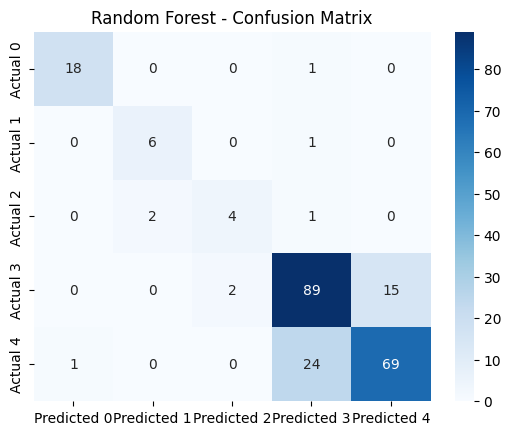

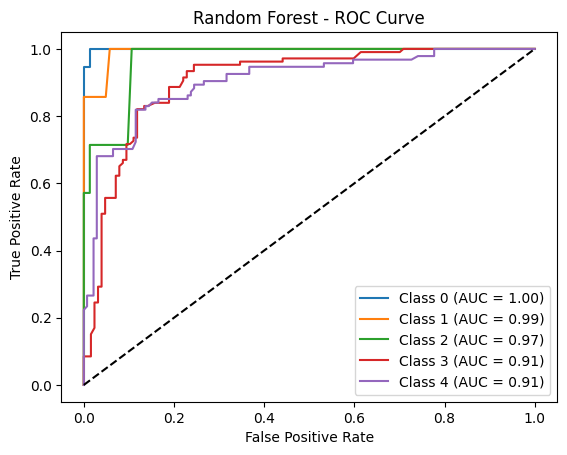

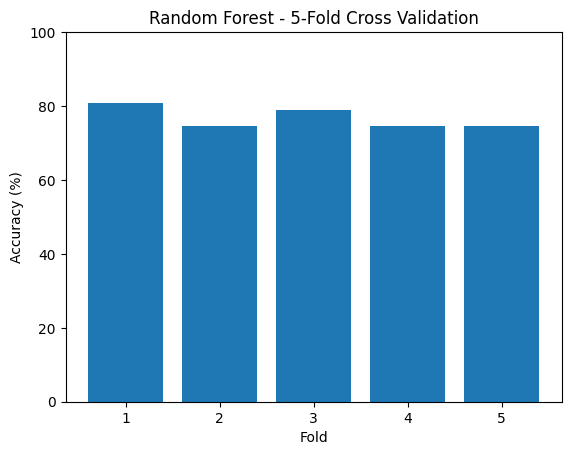

Random Forest Mean CV Accuracy: 76.79%


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf*100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.title('Random Forest - Confusion Matrix')
plt.show()

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=[0,1,2,3,4])
y_score_rf = rf_model.predict_proba(X_test)
plt.figure()
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_binarized[:,i], y_score_rf[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
plt.bar(range(1,6), cv_scores_rf*100)
plt.ylim(0,100)
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Random Forest - 5-Fold Cross Validation')
plt.show()
print(f"Random Forest Mean CV Accuracy: {cv_scores_rf.mean()*100:.2f}%")


In [34]:
# Required imports
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd

#  Dropdowns for manual input
age_dropdown = widgets.Dropdown(
    options=['18-20', '21-23', '24-26', '27 or older'],
    description='Age:'
)

year_dropdown = widgets.Dropdown(
    options=['1st year', '2nd year', '3rd year', '4th year', 'Graduate student'],
    description='Year:'
)

smoking_freq_dropdown = widgets.Dropdown(
    options=['Dont smoke','Only on social occasions','Monthly','Weekly','Daily'],
    description='Smoking:'
)

age_start_smoke_dropdown = widgets.Dropdown(
    options=['Dont smoke','24 or older','21-23','18-20','Below 18'],
    description='Start Smoke:'
)

alcohol_freq_dropdown = widgets.Dropdown(
    options=['Dont consume alcohol','Only on social occasions','Monthly','Weekly','Daily'],
    description='Alcohol Freq:'
)

alcohol_intake_dropdown = widgets.Dropdown(
    options=['Dont drink alcohol','1-2 drinks','3-5 drinks','6-10 drinks','More than 10 drinks'],
    description='Alcohol Intake:'
)

help_seeking_dropdown = widgets.Dropdown(
    options=['Yes','No'],
    description='Help Seeking:'
)

interest_reduce_dropdown = widgets.Dropdown(
    options=['Yes','No'],
    description='Reduce Interest:'
)

field_dropdown = widgets.Dropdown(
    options=['Arts and Humanities','Business and Economics','Other','Science and Technology'],
    description='Field:'
)

reasons_smoking_dropdown = widgets.Dropdown(
    options=['Curiosity','Dont smoke','Habit or addiction','Social reasons'],
    description='Smoking Reason:'
)

reasons_alcohol_dropdown = widgets.Dropdown(
    options=['Dont drink alcohol','For fun','Social purposes','To cope with stress'],
    description='Alcohol Reason:'
)

cope_stress_dropdown = widgets.Dropdown(
    options=['Drinking alcohol','Exercise','Meditation','Other','Smoking'],
    description='Cope Stress:'
)

# Button to predict
predict_button = widgets.Button(description="Predict Psychological Wellness")
output = widgets.Output()

# --- Mapping numeric prediction to friendly message ---
wellness_messages = {
    0: "Excellent ✅",
    1: "Good 🙂",
    2: "Average 😐",
    3: "Below Average 😟",
    4: "Poor ❌"
}

# --- Prediction function ---
def predict_model(b):
    # Mapping same as training
    age_map = {'18-20':0,'21-23':1,'24-26':2,'27 or older':3}
    year_map = {'1st year':0,'2nd year':1,'3rd year':2,'4th year':3,'Graduate student':4}
    smoking_map = {'Dont smoke':0,'Only on social occasions':1,'Monthly':2,'Weekly':3,'Daily':4}
    age_start_map = {'Dont smoke':0,'24 or older':1,'21-23':2,'18-20':3,'Below 18':4}
    alcohol_freq_map = {'Dont consume alcohol':0,'Only on social occasions':1,'Monthly':2,'Weekly':3,'Daily':4}
    alcohol_intake_map = {'Dont drink alcohol':0,'1-2 drinks':1,'3-5 drinks':2,'6-10 drinks':3,'More than 10 drinks':4}
    yes_no_map = {'Yes':0,'No':1}

    # Encode inputs
    input_data = [
        age_map[age_dropdown.value],
        year_map[year_dropdown.value],
        smoking_map[smoking_freq_dropdown.value],
        age_start_map[age_start_smoke_dropdown.value],
        alcohol_freq_map[alcohol_freq_dropdown.value],
        alcohol_intake_map[alcohol_intake_dropdown.value],
        yes_no_map[help_seeking_dropdown.value],
        yes_no_map[interest_reduce_dropdown.value],
        # Dummy variables for field
        1 if field_dropdown.value=='Arts and Humanities' else 0,
        1 if field_dropdown.value=='Business and Economics' else 0,
        1 if field_dropdown.value=='Other' else 0,
        1 if field_dropdown.value=='Science and Technology' else 0,
        # Reasons for smoking
        1 if reasons_smoking_dropdown.value=='Curiosity' else 0,
        1 if reasons_smoking_dropdown.value=='Dont smoke' else 0,
        1 if reasons_smoking_dropdown.value=='Habit or addiction' else 0,
        1 if reasons_smoking_dropdown.value=='Social reasons' else 0,
        # Reasons for alcohol
        1 if reasons_alcohol_dropdown.value=='Dont drink alcohol' else 0,
        1 if reasons_alcohol_dropdown.value=='For fun' else 0,
        1 if reasons_alcohol_dropdown.value=='Social purposes' else 0,
        1 if reasons_alcohol_dropdown.value=='To cope with stress' else 0,
        # To cope with stress
        1 if cope_stress_dropdown.value=='Drinking alcohol' else 0,
        1 if cope_stress_dropdown.value=='Exercise' else 0,
        1 if cope_stress_dropdown.value=='Meditation' else 0,
        1 if cope_stress_dropdown.value=='Other' else 0,
        1 if cope_stress_dropdown.value=='Smoking' else 0
    ]

    # Scale
    input_scaled = scaler.transform([input_data])

    # Predict
    pred = rf_model.predict(input_scaled)[0]

    with output:
        output.clear_output()
        message = wellness_messages[pred]
        print(f"Predicted Psychological Wellness: {pred} → {message}")

# Bind button
predict_button.on_click(predict_model)

# Display all widgets
display(
    age_dropdown, year_dropdown, smoking_freq_dropdown, age_start_smoke_dropdown,
    alcohol_freq_dropdown, alcohol_intake_dropdown, help_seeking_dropdown, interest_reduce_dropdown,
    field_dropdown, reasons_smoking_dropdown, reasons_alcohol_dropdown, cope_stress_dropdown,
    predict_button, output
)


Dropdown(description='Age:', options=('18-20', '21-23', '24-26', '27 or older'), value='18-20')

Dropdown(description='Year:', options=('1st year', '2nd year', '3rd year', '4th year', 'Graduate student'), va…

Dropdown(description='Smoking:', options=('Dont smoke', 'Only on social occasions', 'Monthly', 'Weekly', 'Dail…

Dropdown(description='Start Smoke:', options=('Dont smoke', '24 or older', '21-23', '18-20', 'Below 18'), valu…

Dropdown(description='Alcohol Freq:', options=('Dont consume alcohol', 'Only on social occasions', 'Monthly', …

Dropdown(description='Alcohol Intake:', options=('Dont drink alcohol', '1-2 drinks', '3-5 drinks', '6-10 drink…

Dropdown(description='Help Seeking:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Reduce Interest:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Field:', options=('Arts and Humanities', 'Business and Economics', 'Other', 'Science and…

Dropdown(description='Smoking Reason:', options=('Curiosity', 'Dont smoke', 'Habit or addiction', 'Social reas…

Dropdown(description='Alcohol Reason:', options=('Dont drink alcohol', 'For fun', 'Social purposes', 'To cope …

Dropdown(description='Cope Stress:', options=('Drinking alcohol', 'Exercise', 'Meditation', 'Other', 'Smoking'…

Button(description='Predict Psychological Wellness', style=ButtonStyle())

Output()

Logistic Regression Accuracy: 69.10%


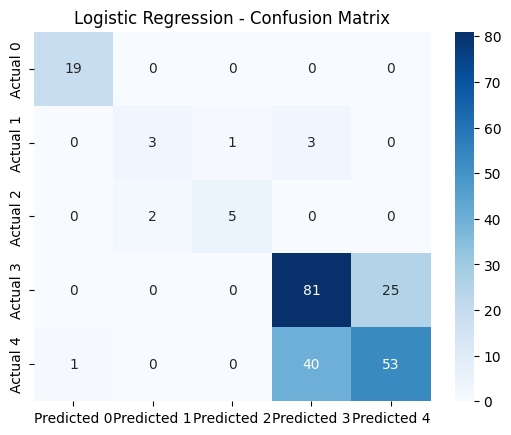

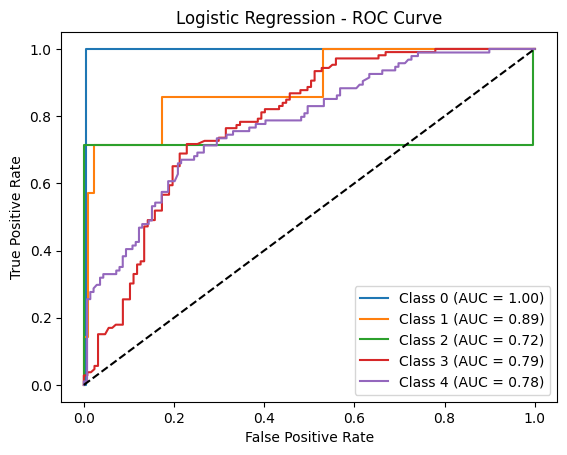

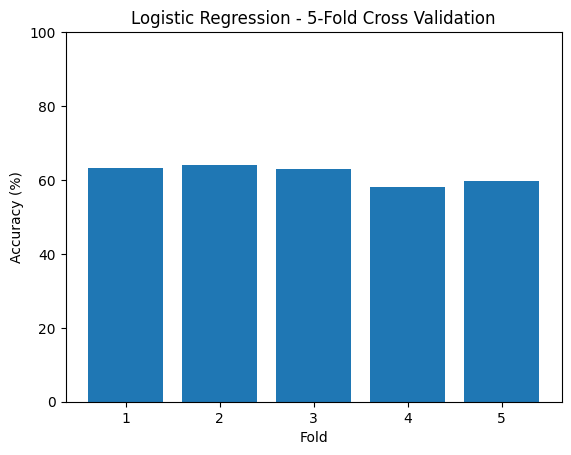

Logistic Regression Mean CV Accuracy: 61.55%


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr*100:.2f}%")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=[0,1,2,3,4])
y_score_lr = lr_model.predict_proba(X_test)
plt.figure()
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_binarized[:,i], y_score_lr[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend()
plt.show()

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)
plt.bar(range(1,6), cv_scores_lr*100)
plt.ylim(0,100)
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Logistic Regression - 5-Fold Cross Validation')
plt.show()
print(f"Logistic Regression Mean CV Accuracy: {cv_scores_lr.mean()*100:.2f}%")


Decision Tree Accuracy: 78.97%


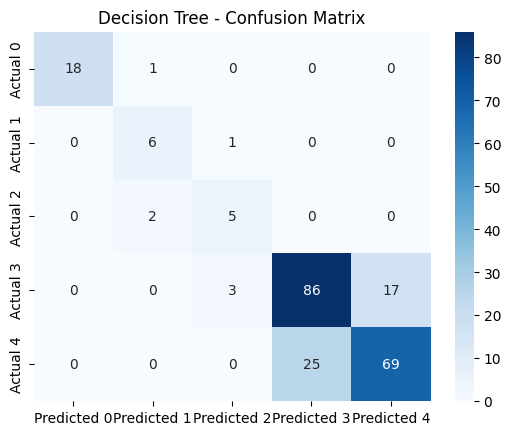

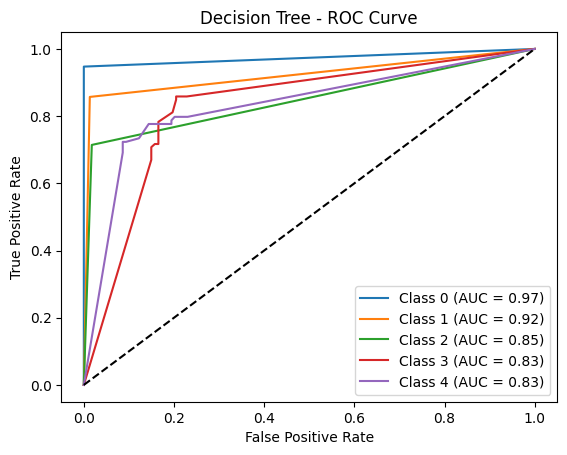

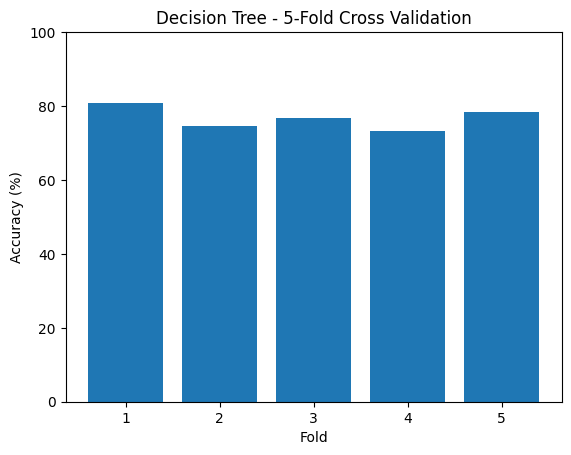

Decision Tree Mean CV Accuracy: 76.79%


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt*100:.2f}%")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=[0,1,2,3,4])
y_score_dt = dt_model.predict_proba(X_test)
plt.figure()
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_binarized[:,i], y_score_dt[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend()
plt.show()

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
plt.bar(range(1,6), cv_scores_dt*100)
plt.ylim(0,100)
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Decision Tree - 5-Fold Cross Validation')
plt.show()
print(f"Decision Tree Mean CV Accuracy: {cv_scores_dt.mean()*100:.2f}%")


KNN Accuracy: 72.10%


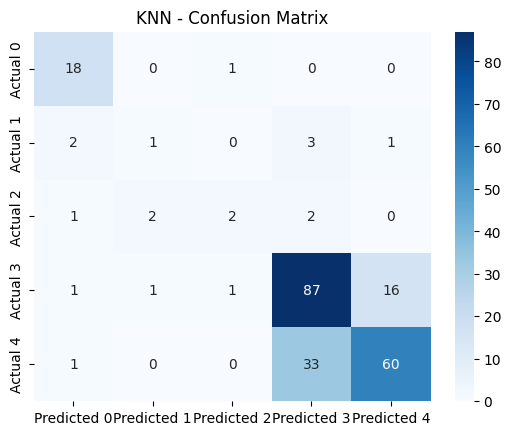

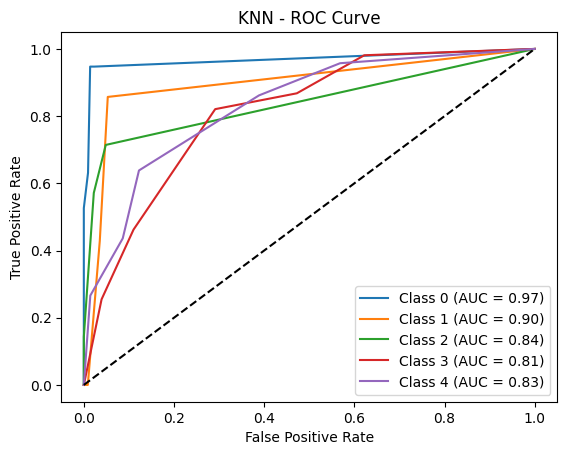

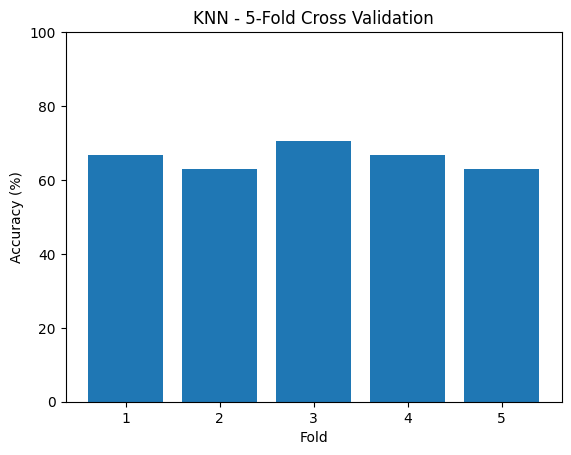

KNN Mean CV Accuracy: 65.95%


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn*100:.2f}%")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.title('KNN - Confusion Matrix')
plt.show()

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=[0,1,2,3,4])
y_score_knn = knn_model.predict_proba(X_test)
plt.figure()
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_binarized[:,i], y_score_knn[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.show()

# Cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5)
plt.bar(range(1,6), cv_scores_knn*100)
plt.ylim(0,100)
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('KNN - 5-Fold Cross Validation')
plt.show()
print(f"KNN Mean CV Accuracy: {cv_scores_knn.mean()*100:.2f}%")
